<a href="https://colab.research.google.com/github/sgupta117/Cat-Dog-Classifications-using-CNN/blob/master/classification_images_Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Cat and Dog Classification/train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Cat and Dog Classification/validation',
        target_size=(150, 150),
        batch_size=100,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1007 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
20/20 - 19s - loss: 0.6767 - acc: 0.5650 - val_loss: 0.6636 - val_acc: 0.5710
Epoch 2/100
20/20 - 19s - loss: 0.6764 - acc: 0.5620 - val_loss: 0.6588 - val_acc: 0.5830
Epoch 3/100
20/20 - 19s - loss: 0.6693 - acc: 0.5700 - val_loss: 0.6921 - val_acc: 0.5220
Epoch 4/100
20/20 - 19s - loss: 0.6603 - acc: 0.5965 - val_loss: 0.6691 - val_acc: 0.5540
Epoch 5/100
20/20 - 19s - loss: 0.6586 - acc: 0.6050 - val_loss: 0.6274 - val_acc: 0.6460
Epoch 6/100
20/20 - 19s - loss: 0.6517 - acc: 0.6035 - val_loss: 0.6305 - val_acc: 0.6380
Epoch 7/100
20/20 - 19s - loss: 0.6504 - acc: 0.6025 - val_loss: 0.6178 - val_acc: 0.6570
Epoch 8/100
20/20 - 19s - loss: 0.6415 - acc: 0.6320 - val_loss: 0.6187 - val_acc: 0.6440
Epoch 9/100
20/20 - 20s - loss: 0.6293 - acc: 0.6335 - val_loss: 0.6053 - val_acc: 0.6750
Epoch 10/100
20/20 - 19s - loss: 0.6295 - acc: 0.6295 - val_loss: 0.5993 - val_acc: 0.6730
Epoch 11/100
20/20 - 19s - loss: 0.6252 - acc: 0.6430 - val_loss: 0.6009 - val_acc: 0.6810
Epoch 12

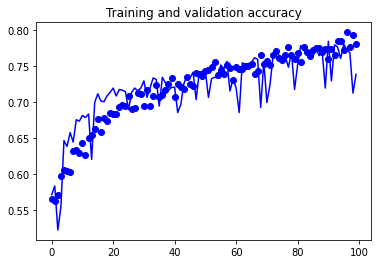

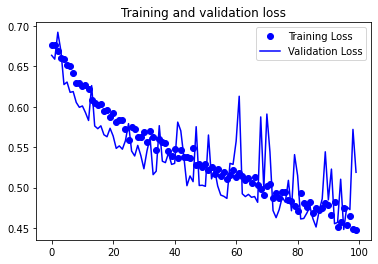

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat.2043.jpg to cat.2043.jpg
[0.]
cat.2043.jpg is a cat


In [ ]:
from keras.models import save_model

model.save("/content/drive/My Drive/Cat and Dog Classification/output_model_.h5")